# Spotify Song Popularity Analysis 

In this project, we will be using predictive analysis to predict the popularity of a song based on its list of features from two particular spotify datasets. In order to achieve this goal, we will be analyzing different spotify audio features of songs and running and evaluating different models to find the most appropriate one for our prediction.

## Outline
- [Importing Packages and Libraries](#Importing-Packages-and-Libraries)
- [Loading and Investigating the Raw Data](#Loading-and-Investigating-the-Raw-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

## Importing Packages and Libraries

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns 

from matplotlib import pyplot as plt 
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import lightgbm as lgb

import warnings 
warnings.filterwarnings("ignore")

## Loading and Investigating the Raw Data
The following are the two datasets we will be using for our project:

In [3]:
df = pd.read_csv("data.csv")
old_data = pd.read_csv("SpotifyFeatures.csv")
print(" ---------------------- Dataset 1 ---------------------- ")
print(df.columns)
print(df.size)
print(" ---------------------- Dataset 2 ---------------------- ")
print(old_data.columns)
print(df.size)

 ---------------------- Dataset 1 ---------------------- 
Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')
3228271
 ---------------------- Dataset 2 ---------------------- 
Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')
3228271


As the above two datasets capture slightly different features of the songs, we will join them so that we can analyse and evaluate more features of the songs.

In [29]:
new = df.merge(old_data, left_on = 'id', right_on='track_id')
new.size

2623522

In [30]:
df.sample(15)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
9875,0.9390,['Fred Astaire'],0.133,296720,0.220,0,2QVCITzthDQxPDCmBx5Jvq,0.246000,5,0.1260,-12.936,1,He Loves And She Loves - Alternate Version,13,1957-02-13,0.0379,82.391,0.1220,1957
19613,0.5080,['The Isley Brothers'],0.463,511480,0.370,0,20FEFxhl29eRP2AR4WRj3r,0.000827,7,0.3880,-10.341,0,"Ain't I Been Good to You, Pts. 1 & 2",24,1974-09-07,0.0528,130.064,0.3340,1974
3121,0.1280,['Van Morrison'],0.759,209733,0.395,0,3y8N3R6a2SbcrFXbXA77PS,0.272000,0,0.0969,-16.473,0,I've Been Working - 1999 Remaster,29,1970-11-15,0.0316,109.568,0.9170,1970
42496,0.5050,['Cher'],0.535,159587,0.491,0,2dTFjXVWDhu2kvXyFXBwYI,0.000000,0,0.1720,-16.234,0,Needles And Pins,19,1965-10-16,0.0404,130.155,0.5420,1965
65837,0.7980,['Andy Harlow'],0.667,281400,0.633,0,48CvUrhho2Qs4B4ssUacKO,0.019800,2,0.0951,-9.332,0,El Primer Montuno,29,1972-01-01,0.0373,141.935,0.7310,1972
84830,0.1630,['Robert Palmer'],0.690,255093,0.841,0,0bSr5pybJSlgG5OZH441gF,0.000003,9,0.0441,-13.357,1,Simply Irresistible,52,1988-06-22,0.0384,142.782,0.7160,1988
86234,0.2550,['Kenny Chesney'],0.612,200440,0.620,0,1sR3kJi14jA8Gau3a0yXAo,0.000000,7,0.1290,-9.785,1,The Good Stuff,58,2002-04-02,0.0645,143.780,0.5020,2002
27920,0.1780,['Roy Ayers Ubiquity'],0.836,237373,0.540,0,39byiHhJMzyfQwZtW0awF1,0.000363,10,0.0208,-12.263,0,Running Away,32,1977,0.1040,116.165,0.8630,1977
4815,0.9540,['Enya'],0.665,97307,0.335,0,2CMvIxdRmZcIzP8Xd06bia,0.873000,2,0.1010,-19.426,0,Epona,30,1987,0.0532,98.739,0.6930,1987
149619,0.0557,['Fleetwood Mac'],0.609,242880,0.489,0,44mVEasniDC1wAhwU4uwx2,0.000955,9,0.0682,-11.079,0,Tango in the Night - 2017 Remaster,44,1987-04-13,0.0416,111.038,0.4160,1987


### <b>Data Description</b>
<font size=3>
    

<b>acousticness:</b> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
    
<b>artists:</b> The name(s) of the artist(s) who perform the track.
    
<b>danceability:</b> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    
<b>duration_ms:</b> A track's duration in milliseconds.
    
<b>energy:</b> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    
<b>explicit:</b> Whether the track was labeled as "explicit" due to content. 1 = Yes, 0 = No.
    
<b>id:</b> Track's unique identifier.
    
<b>instrumentalness:</b> Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    
<b>key:</b> The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
    
<b>liveness:</b> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
    
<b>loudness:</b> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. NOTE: Loudness is measured negatively here on purpose. This is because we are dealing with digital sound that a computer can listen to which is measured differently than what the human ear can listen to. This is sometimes why you will see negative numbers when you adjust the volume on your surround sound system. For more information on this, you can read this article: https://www.cablechick.com.au/blog/why-does-my-amplifier-use-negative-db-for-volume/
    
<b>mode:</b> Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
    
<b>name:</b> Name of Track
    
<b>popularity:</b> The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
    
<b>release_date:</b> Date of track's release.
    
<b>speechiness:</b> Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
<b>tempo:</b> The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
    
<b>valence:</b> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
<b>year:</b> Year of track's release.
    


Before getting started, let's get to know our dataset and clean it as we go along.

In [31]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [32]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [33]:
df.shape

(169909, 19)

In [34]:
df.sample(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
69581,0.007470,['Tame Impala'],0.458,199093,0.840,0,4SgcE7RxpK3ydWrjoAQH1K,0.204000,5,0.2300,-4.812,1,Why Won't You Make Up Your Mind?,53,2010-05-21,0.0566,129.030,0.543,2010
91027,0.956000,['Nat King Cole'],0.708,168827,0.185,0,5Za8ZbtUJGmNBCclijKk5g,0.908000,8,0.1210,-19.175,1,Rose Room - Remastered,13,1952-09-15,0.0464,145.693,0.707,1952
114202,0.406000,['Ricky Martin'],0.590,279000,0.597,0,4S1bYWrLOC8smuy8kJzxKQ,0.000023,9,0.1690,-6.158,1,"Te Extraño, Te Olvido, Te Amo",64,1995-09-12,0.0275,121.051,0.466,1995
81338,0.969000,"['Les Paul', 'Mary Ford']",0.556,123800,0.520,0,2hKSrRg3hss6NMa33snTeo,0.902000,5,0.3540,-8.104,0,Josephine,14,1953-01-01,0.1130,144.039,0.804,1953
137524,0.154000,['Эрнест Хемингуэй'],0.800,95700,0.328,1,0Tyr2WpQlXyPq9VI4Ir7Fw,0.000000,6,0.2670,-17.704,1,Часть 44.3 - Старик и море,0,1952,0.9250,42.490,0.344,1952
128172,0.983000,"['Wolfgang Amadeus Mozart', 'George Szell']",0.458,302307,0.107,0,27bYwOqqyeeRzRtLWhMdsS,0.222000,0,0.0787,-18.498,1,"Sonata No. 7 in F Major for Piano and Violin, ...",0,1947,0.0430,139.399,0.604,1947
157121,0.263000,['Queen'],0.863,186853,0.384,0,6t83NA3g6MUhdjEetnyZPT,0.000327,9,0.2090,-12.823,1,Who Needs You - Remastered 2011,30,1977-10-28,0.0515,120.646,0.900,1977
59456,0.000077,['The Exploited'],0.257,171693,0.999,0,3qnq95A58mwd129tVhbBXr,0.005180,7,0.4380,-1.855,0,UK 82,31,1982,0.1370,140.946,0.149,1982
103837,0.040600,['Beastie Boys'],0.665,218067,0.615,0,3vull6iBmoDFACC8TRVabm,0.000000,4,0.9200,-9.245,0,Slow And Low,46,1986-11-15,0.3950,168.760,0.692,1986
69156,0.039800,['Fatlip'],0.676,262322,0.787,0,2R7cA3U7D6VgRZm3oLsuYm,0.000000,1,0.7560,-3.180,1,Today's Your Day (Wachagonedu?),44,2005,0.3080,82.258,0.857,2005


In [116]:
print("Unique Keys -> ", len(df.key.unique()))

Unique Keys ->  12


In [117]:
print("Unique Artists -> ",len(df.artists.unique())) #artists are in list fix this

Unique Artists ->  33375


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

Removing the track id as we will not be needing this for our analysis or evaluation:

In [36]:
df.drop(['id'], axis=1, inplace=True)

Changing the popularity and duration type as float to allow easy data processing.

In [19]:
df['bin_pop'] = df['popularity'].apply(lambda x: 0 if int(x)<35 else 1)

In [20]:
df.sample(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,bin_pop
14118,0.659000,['Los Caminantes'],0.670,132400,0.401,0,7bDI8qGvgezCyqXoyizurm,0.000000,9,0.2680,-8.780,1,Pobre Millonario,41,1999-07-27,0.1240,77.205,0.425,1999,1
145886,0.908000,"['Lata Mangeshkar', 'Shamshad Begum']",0.686,298933,0.279,0,0tbWEgUoz1vYfhB0ctcS1N,0.057500,3,0.0816,-14.046,1,Pyar Ke Jahan Ki Nirali Sarkar,2,1949-12-01,0.0901,97.777,0.926,1949,0
67837,0.704000,"['Chalino Sanchez', 'Los Amables Del Norte']",0.493,175891,0.610,0,0gySORG1cXDarlA9LEQvSi,0.000013,5,0.0878,-6.992,1,Alma Enamorada,44,1992-05-14,0.0454,165.832,0.935,1992,1
26500,0.983000,"['Jimmy Smith', 'Kenny Burrell']",0.368,148933,0.102,0,0Oc5bosP6107f6vP5JUqDy,0.894000,5,0.0955,-21.976,1,Georgia On My Mind,18,1963,0.0348,68.825,0.383,1963,0
22584,0.000734,['Keane'],0.471,220133,0.843,0,1hoyGI5Hj81BT7Rkb9uXGF,0.000019,4,0.1630,-3.592,1,Bend & Break,44,2004-01-01,0.0295,137.920,0.484,2004,1
157517,0.529000,['Joan Jett & The Blackhearts'],0.313,207320,0.559,0,05ok9A1VF7Nk2v0UW98QcN,0.000002,2,0.2280,-5.126,1,You Don't Own Me,34,1981-01-23,0.0292,171.790,0.532,1981,0
165014,0.869000,['The Rolling Stones'],0.352,317173,0.656,0,7D2f7zoIwRxeIhmeer8aWm,0.800000,5,0.2210,-5.721,1,Let It Loose,32,1972-05-12,0.0289,76.121,0.363,1972,0
45718,0.196000,['JAY-Z'],0.726,300000,0.737,1,1jsYym0WPXsetwPs8mY45w,0.000263,1,0.1490,-7.709,1,Lucky Me,37,1997-11-04,0.0502,91.983,0.585,1997,1
160738,0.415000,['John Mayer'],0.563,241347,0.401,0,05Ez6KwjICkscWQVTsT3f5,0.003050,5,0.1580,-9.073,1,I Will Be Found (Lost At Sea),57,2013-08-20,0.0243,139.863,0.277,2013,1
15731,0.009640,['7eventh Time Down'],0.580,176616,0.884,0,4YZkx9hCBOdaI71lzKEnOx,0.000002,6,0.1160,-4.358,1,God Is on the Move,54,2015-08-21,0.0381,105.927,0.464,2015,1


In [21]:
df.groupby('bin_pop').size()

bin_pop
0    87757
1    82152
dtype: int64

In [80]:
df.groupby('year').size()

year
1921     128
1922      72
1923     169
1924     237
1925     263
        ... 
2016    1969
2017    2000
2018    2000
2019    2000
2020    1756
Length: 100, dtype: int64

In [112]:
df['popularity'] = df['popularity'].astype(float)
df['duration_ms'] = df['duration_ms'].astype(float)

Separating the continuous and categorical features for ease in future analysis.

In [4]:
continuous_columns = [col for col in df.columns if df[col].dtype == float or df[col].dtype == int]
categorical_columns = [col for col in df.columns if df[col].dtype == object]

In [41]:
print("Continuous Columns -> ",continuous_columns)
print("Categorical Columns -> ",categorical_columns)

Continuous Columns ->  ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence', 'year']
Categorical Columns ->  ['artists', 'name', 'release_date']


## Exploratory Data Analysis

Through this analysis, we will be:
- checking for bias (across genres, key, mode)
- investigating the distribution of popularity
- producing and analyzing correlation Matrix
- analyzing the popularity relation with features (regression)

### Checking data balance
Let's explore the balance of some of the main spotify features of the songs.

### Palying with release_date

In [ ]:
count = 0
for ind, dt in df['release_date'].items():
    if len(dt) == 4:
        count += 1
count

50382

In [ ]:
def date_dummy(txt):
    dummy = "-01-01"
    return txt+dummy

In [ ]:
df['release_date'] = df['release_date'].apply(lambda x: date_dummy(x) if len(x) == 4 else x)


### Year
Let's start by exploring the year feature.

In [42]:
print(df['year'].min())
print(df['year'].max())
df['year'].unique()

1921
2020


array([1928, 1930, 1935, 1936, 1940, 1942, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1929, 1931, 1932, 1933, 1934, 1937, 1938, 1939, 1941, 1943,
       1944])

In [82]:
df1 = df.groupby('year', as_index=False).size().sort_values(by='size',ascending=True)

Text(0.5, 1.0, 'Number of songs per Year')

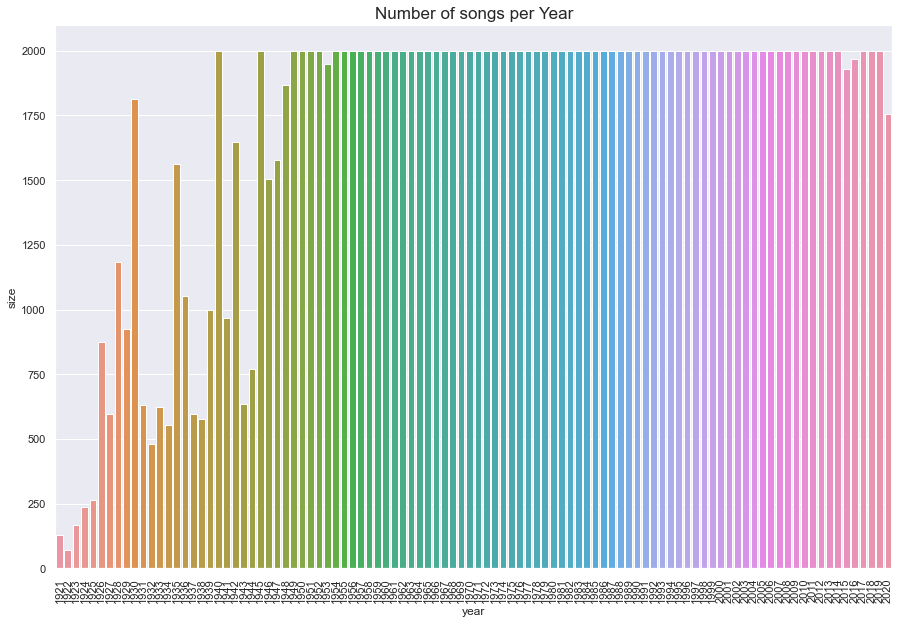

In [91]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x='year', y='size', data=df1).set_title("Number of songs per Year", fontsize=17)


As the songs are spread across many different years, let's create year groups to allow  a better representation.

In [44]:
df1['Year Bin'] = pd.cut(df1['year'], bins = range(1920,2021,10))

In [45]:
df1.sample(5)

,year,size,Year Bin
43,1964,2000,"(1960, 1970]"
69,1990,2000,"(1980, 1990]"
26,1947,1579,"(1940, 1950]"
91,2012,2000,"(2010, 2020]"
1,1922,72,"(1920, 1930]"


Let's see how many songs we have in the dataset for each year group:

In [118]:
df1_1 = df1.groupby('Year Bin', as_index=False)['size'].sum()
df1_1

,Year Bin,size
0,"(1920, 1930]",6260
1,"(1930, 1940]",9075
2,"(1940, 1950]",14968
3,"(1950, 1960]",19950
4,"(1960, 1970]",20000
5,"(1970, 1980]",20000
6,"(1980, 1990]",20000
7,"(1990, 2000]",20000
8,"(2000, 2010]",20000
9,"(2010, 2020]",19656


Transforming the information above into a visual representation using a barplot.

Text(0.5, 1.0, 'Number of songs per decade')

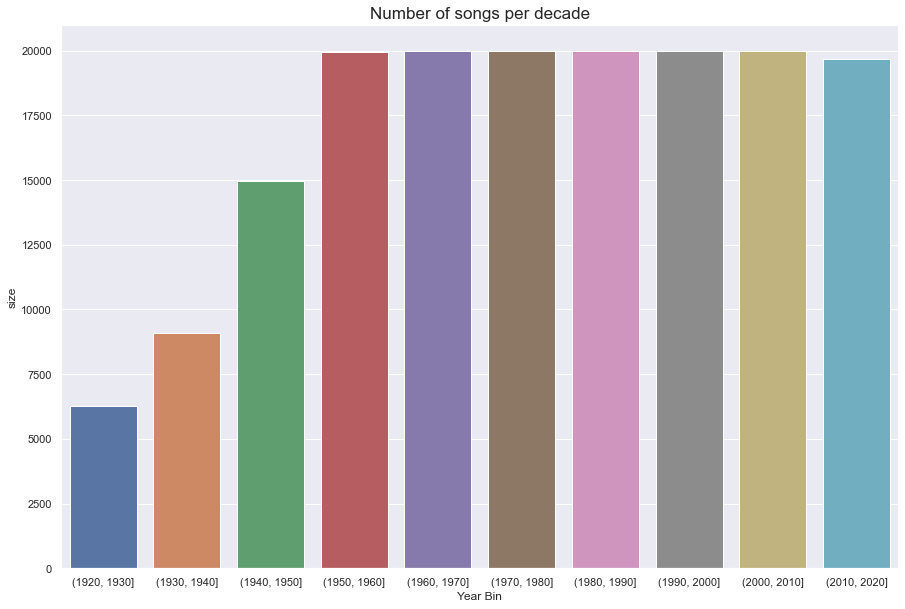

In [47]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year Bin', y='size', data=df56).set_title("Number of songs per decade", fontsize=17)

From the representation, we cleary see that the number of songs in our dataset before 1940 were fewer and these rapidly increased to about 20,000 in 1950 and have been constant until 2000-2010. The umber of songs in our dataset decrease in the year group 2010-2020.

### Key
Exploring the key feature.

Text(0.5, 1.0, 'Number of songs per key')

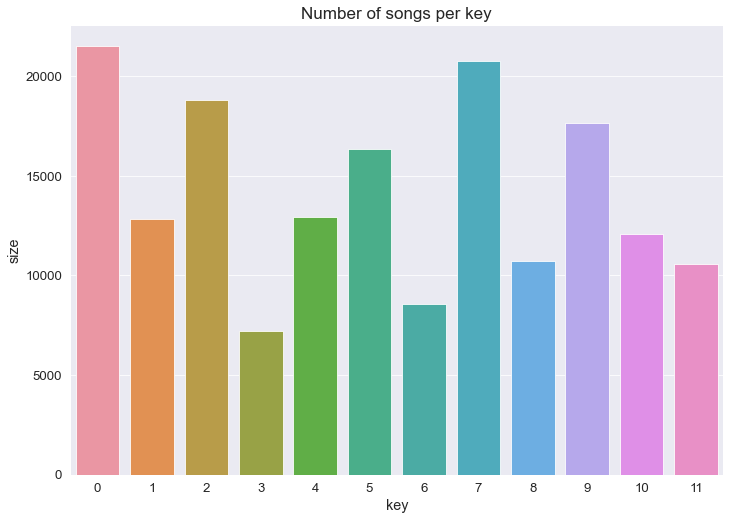

In [119]:
df2 = df.groupby('key', as_index=False).size().sort_values(by='size',ascending=True)
sns.barplot(x='key', y='size', data=df2).set_title("Number of songs per key", fontsize=17)

We see a fluctuation across the different keys and the number of songs produced, with no certain pattern in the key number and the number of songs produced. However, the highest number of songs produced have a key of 0, while the least number of songs are in key 4.

### Mode
Exploring the mode feature.

Text(0.5, 1.0, 'Number of songs per mode')

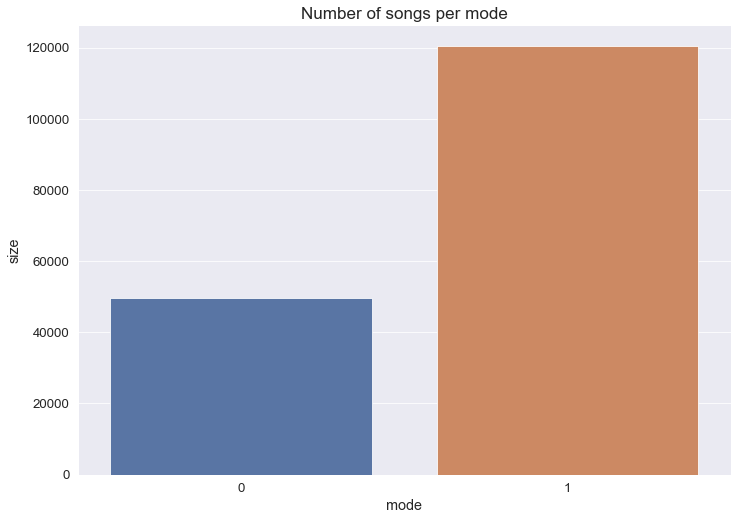

In [120]:
df3 = df.groupby('mode', as_index=False).size().sort_values(by='size',ascending=True)
sns.barplot(x='mode', y='size', data=df3).set_title("Number of songs per mode", fontsize=17)

A significant majority of the tracks are produced in the major modality while a fewer number of songs belong to the minor modality.

### Explicit
Exploring the explicit feature.

Text(0.5, 1.0, 'Number of songs per explict rate')

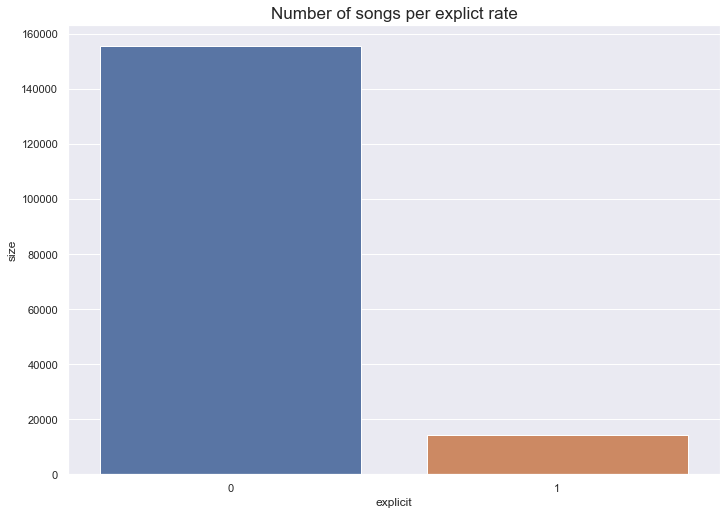

In [50]:
df4 = df.groupby('explicit', as_index=False).size().sort_values(by='size',ascending=True)
sns.barplot(x='explicit', y='size', data=df4).set_title("Number of songs per explict rate", fontsize=17)

A significantly larger number of were not labelled as explicit, as opposed to the number of songs that were labelled as explicit

### Distribution of Popularity

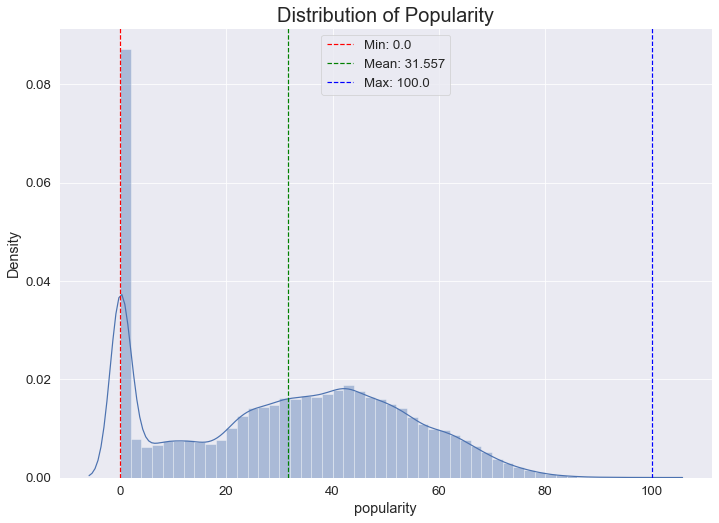

In [51]:
# Distribution of popularity score
sns.set_context("paper", font_scale=1.5)
sns.distplot(df.popularity).set_title("Distribution of Popularity", fontsize=20)
plt.axvline(df.popularity.min(), 0,1, label="Min: " + str(df.popularity.min()), color = 'red', linestyle='dashed')
plt.axvline(df.popularity.mean(), 0,1, label="Mean: " + str(round(df.popularity.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.popularity.max(), 0,1, label="Max: " + str(df.popularity.max()), color = 'blue', linestyle='dashed')
plt.legend()

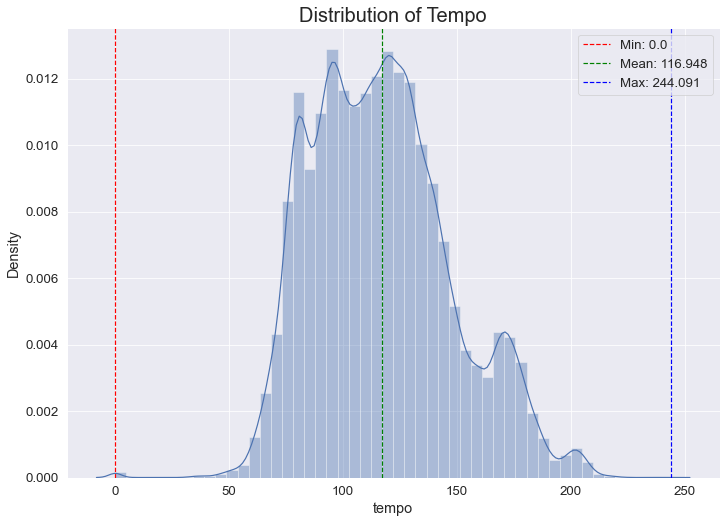

In [54]:
sns.distplot(df.tempo).set_title("Distribution of Tempo", fontsize=20)
plt.axvline(df.tempo.min(), 0,1, label="Min: " + str(df.tempo.min()), color = 'red', linestyle='dashed')
plt.axvline(df.tempo.mean(), 0,1, label="Mean: " + str(round(df.tempo.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.tempo.max(), 0,1, label="Max: " + str(df.tempo.max()), color = 'blue', linestyle='dashed')
plt.legend()

In [55]:
# df_valence = df.groupby('valence', as_index=False).size().sort_values(by='size',ascending=True)
# df_valence.sample(5)

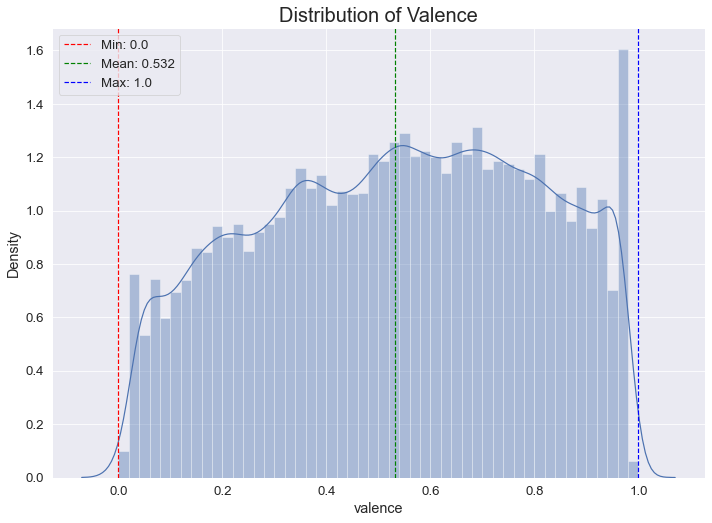

In [56]:
sns.distplot(df.valence).set_title("Distribution of Valence", fontsize=20)
plt.axvline(df.valence.min(), 0,1, label="Min: " + str(df.valence.min()), color = 'red', linestyle='dashed')
plt.axvline(df.valence.mean(), 0,1, label="Mean: " + str(round(df.valence.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.valence.max(), 0,1, label="Max: " + str(df.valence.max()), color = 'blue', linestyle='dashed')
plt.legend()

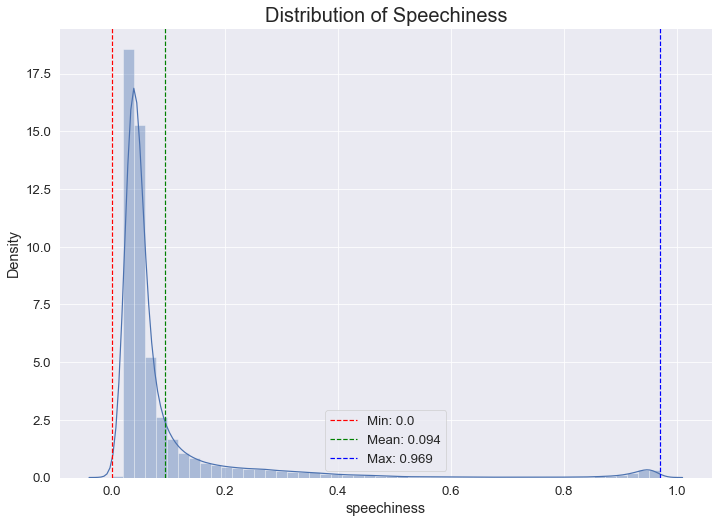

In [57]:
sns.distplot(df.speechiness).set_title("Distribution of Speechiness", fontsize=20)
plt.axvline(df.speechiness.min(), 0,1, label="Min: " + str(df.speechiness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.speechiness.mean(), 0,1, label="Mean: " + str(round(df.speechiness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.speechiness.max(), 0,1, label="Max: " + str(df.speechiness.max()), color = 'blue', linestyle='dashed')
plt.legend()

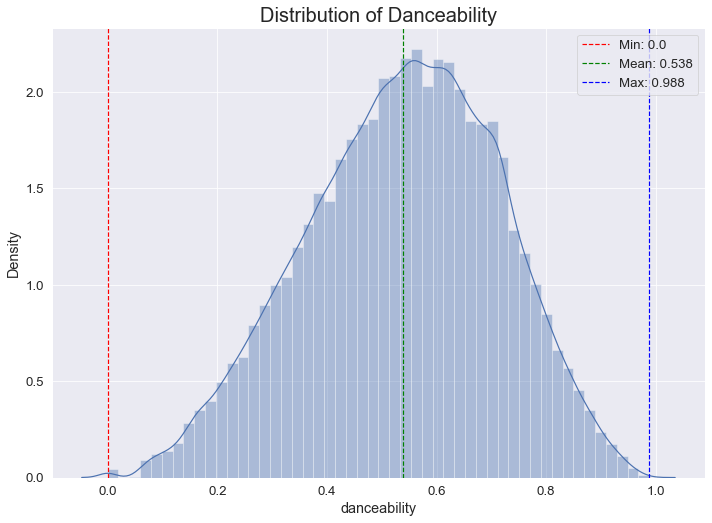

In [58]:
sns.distplot(df.danceability).set_title("Distribution of Danceability", fontsize=20)
plt.axvline(df.danceability.min(), 0,1, label="Min: " + str(df.danceability.min()), color = 'red', linestyle='dashed')
plt.axvline(df.danceability.mean(), 0,1, label="Mean: " + str(round(df.danceability.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.danceability.max(), 0,1, label="Max: " + str(df.danceability.max()), color = 'blue', linestyle='dashed')
plt.legend()

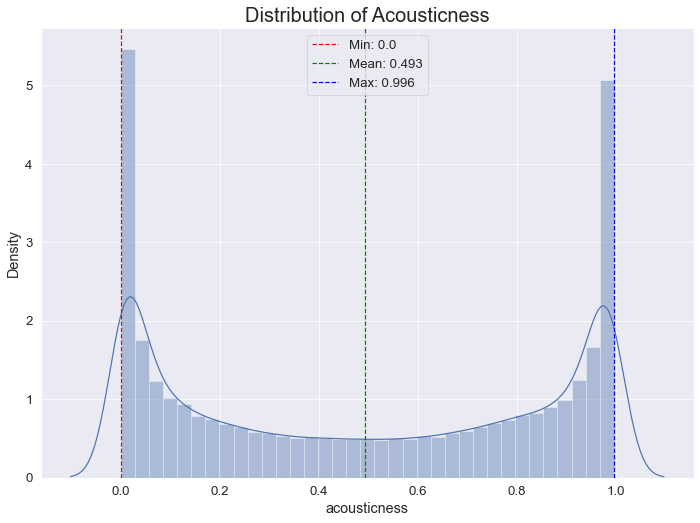

In [59]:
sns.distplot(df.acousticness).set_title("Distribution of Acousticness", fontsize=20)
plt.axvline(df.acousticness.min(), 0,1, label="Min: " + str(df.acousticness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.acousticness.mean(), 0,1, label="Mean: " + str(round(df.acousticness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.acousticness.max(), 0,1, label="Max: " + str(df.acousticness.max()), color = 'blue', linestyle='dashed')
plt.legend()

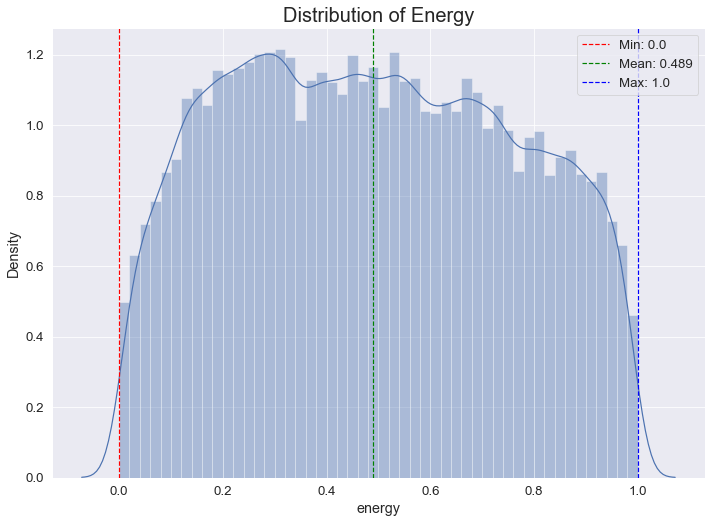

In [60]:
sns.distplot(df.energy).set_title("Distribution of Energy", fontsize=20)
plt.axvline(df.energy.min(), 0,1, label="Min: " + str(df.energy.min()), color = 'red', linestyle='dashed')
plt.axvline(df.energy.mean(), 0,1, label="Mean: " + str(round(df.energy.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.energy.max(), 0,1, label="Max: " + str(df.energy.max()), color = 'blue', linestyle='dashed')
plt.legend()

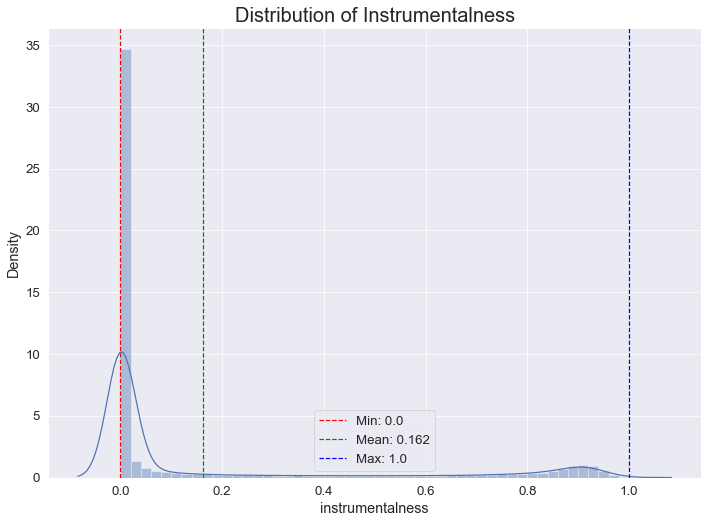

In [61]:
sns.distplot(df.instrumentalness).set_title("Distribution of Instrumentalness", fontsize=20)
plt.axvline(df.instrumentalness.min(), 0,1, label="Min: " + str(df.instrumentalness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.instrumentalness.mean(), 0,1, label="Mean: " + str(round(df.instrumentalness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.instrumentalness.max(), 0,1, label="Max: " + str(df.instrumentalness.max()), color = 'blue', linestyle='dashed')
plt.legend()

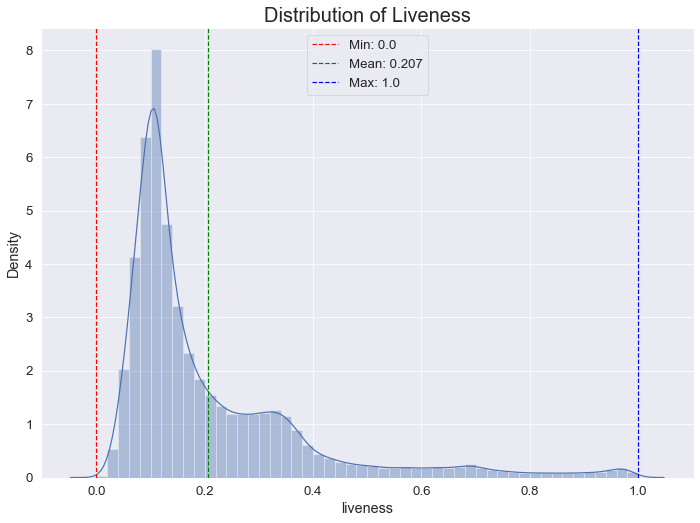

In [62]:
sns.distplot(df.liveness).set_title("Distribution of Liveness", fontsize=20)
plt.axvline(df.liveness.min(), 0,1, label="Min: " + str(df.liveness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.liveness.mean(), 0,1, label="Mean: " + str(round(df.liveness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.liveness.max(), 0,1, label="Max: " + str(df.liveness.max()), color = 'blue', linestyle='dashed')
plt.legend()

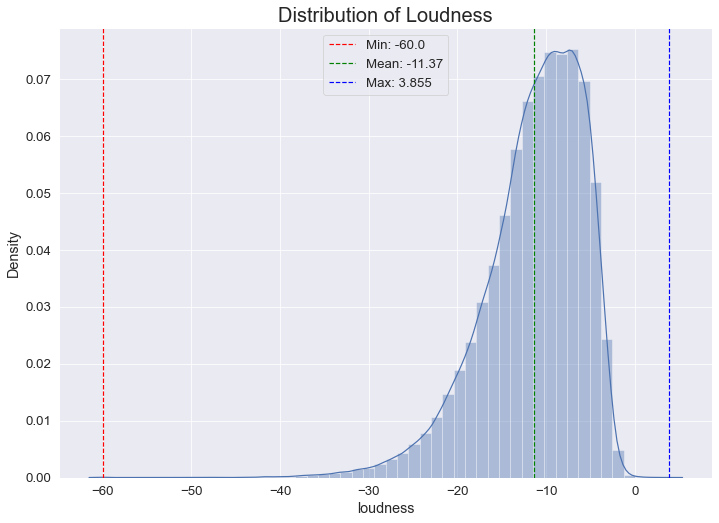

In [63]:
sns.distplot(df.loudness).set_title("Distribution of Loudness", fontsize=20)
plt.axvline(df.loudness.min(), 0,1, label="Min: " + str(df.loudness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.loudness.mean(), 0,1, label="Mean: " + str(round(df.loudness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.loudness.max(), 0,1, label="Max: " + str(df.loudness.max()), color = 'blue', linestyle='dashed')
plt.legend()

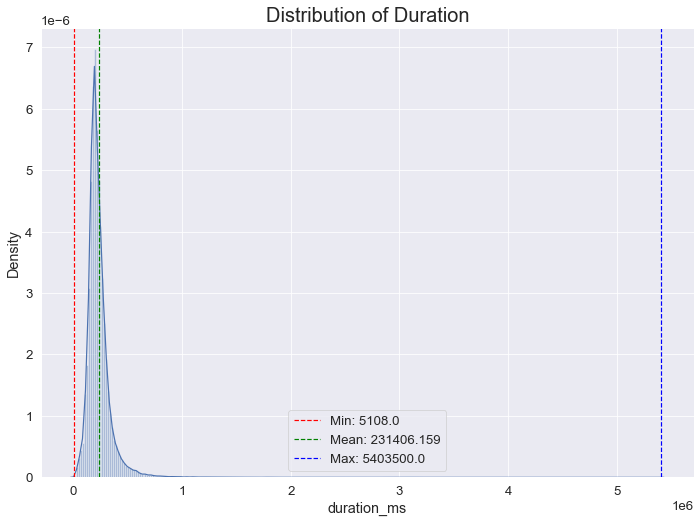

In [64]:
sns.distplot(df.duration_ms,bins=300).set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Min: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Mean: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

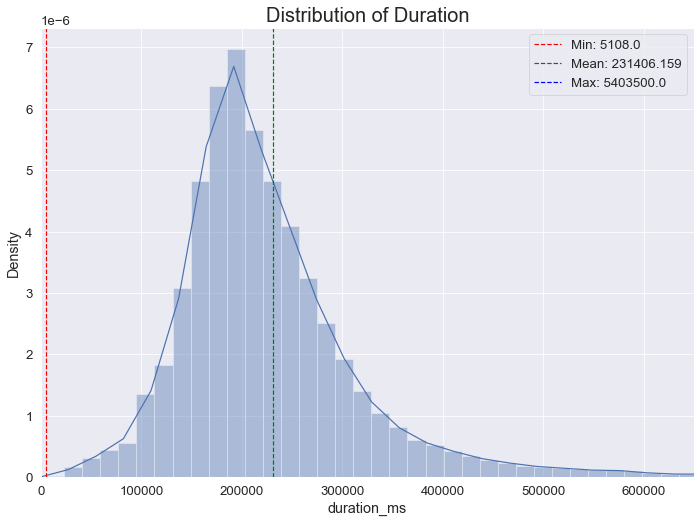

In [65]:
g = sns.distplot(df.duration_ms,bins=300)
g.set_xlim(0,650000)
g.set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Min: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Mean: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

Code taken from: https://www.kaggle.com/richardcsuwandi/spotify-time-series-analysis/notebook 

In [68]:
year_avg = df[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness","speechiness", 
               "year",'duration_ms', 'popularity']].groupby("year").mean().sort_values(by="year").reset_index()

year_avg.sample(10)

,year,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness,duration_ms,popularity
83,2004,0.264210,0.572262,0.660553,0.069287,0.202255,121.676676,0.530876,-7.358680,0.093820,239908.288500,48.974000
1,1922,0.939236,0.480000,0.237026,0.440470,0.238647,101.376139,0.534056,-19.179958,0.115419,167904.541667,0.138889
39,1960,0.757065,0.487343,0.347200,0.178411,0.204116,112.965354,0.527879,-13.777596,0.066810,211600.632500,18.484500
4,1925,0.965422,0.571890,0.264373,0.408893,0.243094,115.671715,0.616430,-14.516707,0.115457,184130.699620,2.707224
72,1993,0.291017,0.574499,0.571926,0.114979,0.198828,119.939785,0.558451,-10.773155,0.078176,252771.800000,42.325000
40,1961,0.751736,0.489204,0.343306,0.260177,0.210878,112.306390,0.518212,-14.158903,0.062203,230635.971500,18.233500
33,1954,0.867919,0.466630,0.259361,0.278372,0.219946,108.532237,0.446452,-15.594470,0.115995,222630.231000,7.083500
71,1992,0.306603,0.563826,0.589771,0.094690,0.200460,122.566212,0.564535,-10.454913,0.075533,245248.012000,42.485000
25,1946,0.924217,0.403515,0.204252,0.495375,0.207839,102.590531,0.373623,-17.713484,0.088025,262658.912841,1.645376
47,1968,0.488828,0.500480,0.456669,0.111797,0.217911,116.488288,0.566766,-12.178926,0.060098,217330.871500,30.915500


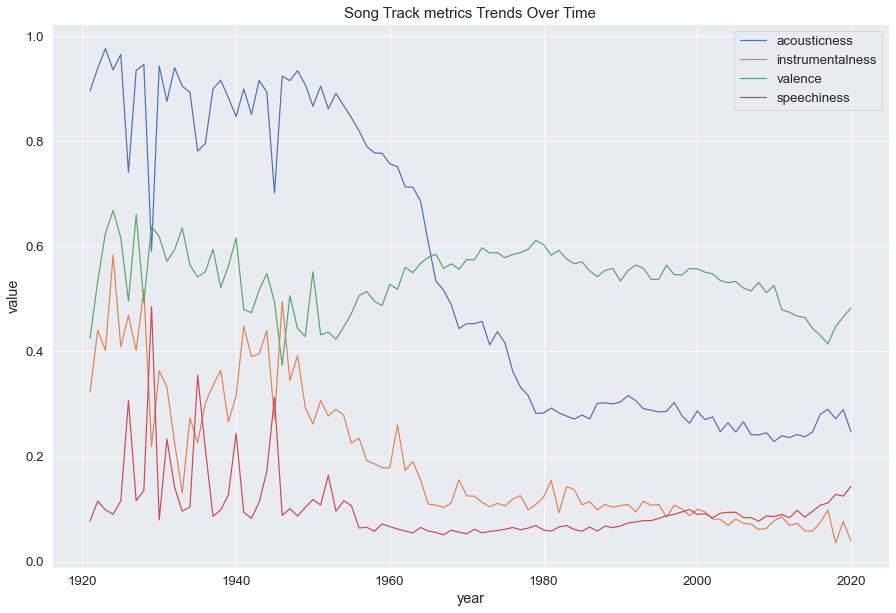

In [69]:
plt.figure(figsize=(15,10))
plt.title("Song Track metrics Trends Over Time", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["acousticness","instrumentalness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
    
plt.ylabel("value")
plt.legend(lines)

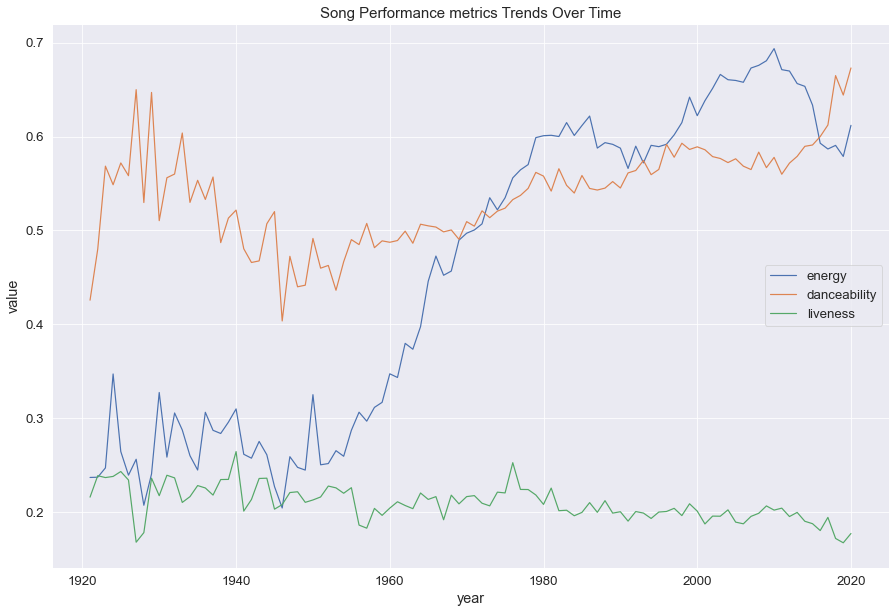

In [70]:
plt.figure(figsize=(15,10))
plt.title("Song Performance metrics Trends Over Time", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["energy", "danceability", "liveness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
    
plt.ylabel("value")
plt.legend(lines)

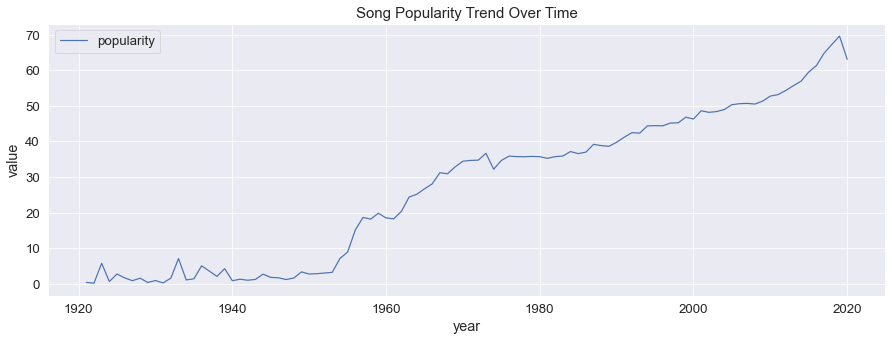

In [71]:
plt.figure(figsize=(15,5))
plt.title("Song Popularity Trend Over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='popularity', data=year_avg)
    
    
plt.ylabel("value")
plt.legend(['popularity'])

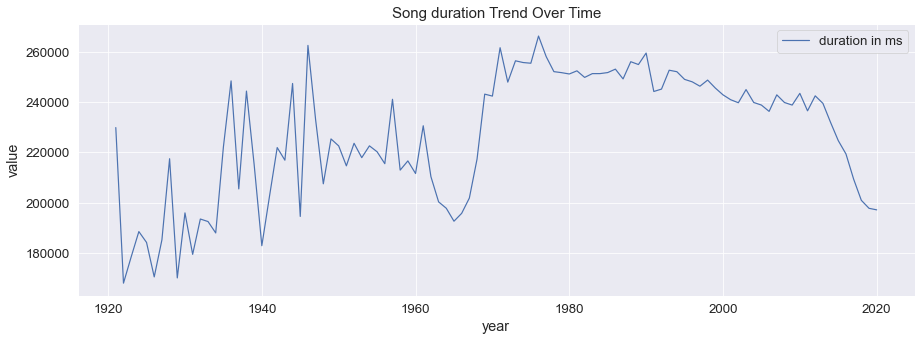

In [72]:
plt.figure(figsize=(15,5))
plt.title("Song duration Trend Over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='duration_ms', data=year_avg)
    
    
plt.ylabel("value")
plt.legend(['duration in ms'])

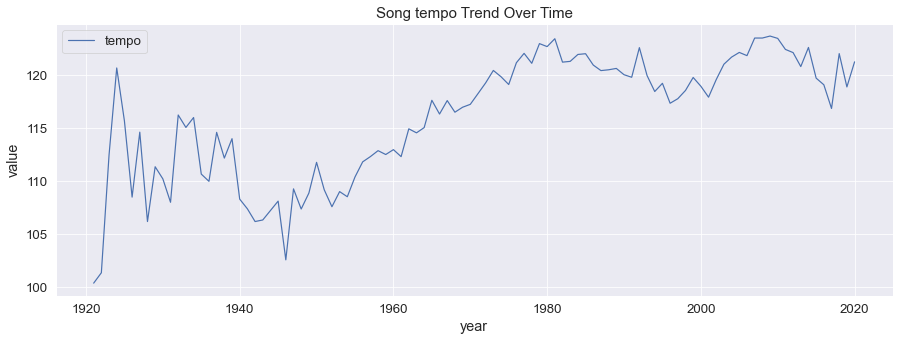

In [73]:
plt.figure(figsize=(15,5))
plt.title("Song tempo Trend Over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='tempo', data=year_avg)
    
    
plt.ylabel("value")
plt.legend(['tempo'])

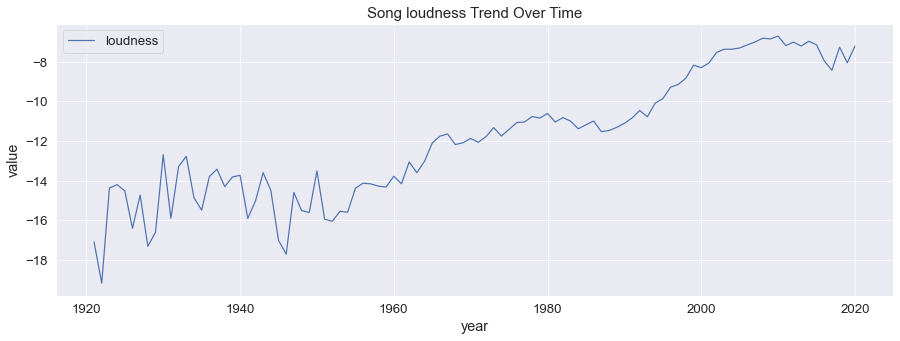

In [74]:
plt.figure(figsize=(15,5))
plt.title("Song loudness Trend Over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='loudness', data=year_avg)
    
    
plt.ylabel("value")
plt.legend(['loudness'])

In [75]:
pop_avg = df[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness","speechiness", 
               "year",'duration_ms', 'popularity']].groupby("popularity").mean().sort_values(by="popularity").reset_index()

pop_avg.sample(10)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness,year,duration_ms
82,82.0,0.255917,0.692568,0.624827,0.013852,0.170114,117.329086,0.527947,-5.935284,0.105200,2015.493827,205521.246914
35,35.0,0.375235,0.542036,0.544611,0.122928,0.203455,119.347755,0.556876,-11.117573,0.070836,1982.416725,244894.581875
27,27.0,0.430754,0.523384,0.521699,0.127675,0.225920,119.552811,0.567896,-11.720947,0.063526,1974.446017,236810.099879
28,28.0,0.418370,0.514856,0.526307,0.132247,0.221951,120.092697,0.562573,-11.817543,0.062714,1975.365354,237100.039791
85,85.0,0.307664,0.705167,0.614944,0.005430,0.159119,125.679194,0.486869,-5.929694,0.091650,2018.694444,203556.944444
83,83.0,0.211622,0.679864,0.622051,0.005872,0.173529,121.048797,0.483792,-6.712763,0.107692,2013.627119,211113.796610
76,76.0,0.229129,0.649031,0.631540,0.019801,0.156843,119.751157,0.506787,-6.841956,0.102508,2011.344710,221515.010239
15,15.0,0.738862,0.500650,0.339042,0.179851,0.209059,112.283300,0.515273,-13.917087,0.088926,1957.721154,220306.815559
40,40.0,0.331747,0.547109,0.586084,0.111205,0.202364,120.662721,0.548426,-10.024777,0.075638,1989.393989,246630.325384
93,93.0,0.150500,0.819667,0.663667,0.000001,0.085667,115.641667,0.719000,-5.310000,0.100000,2019.000000,193251.333333


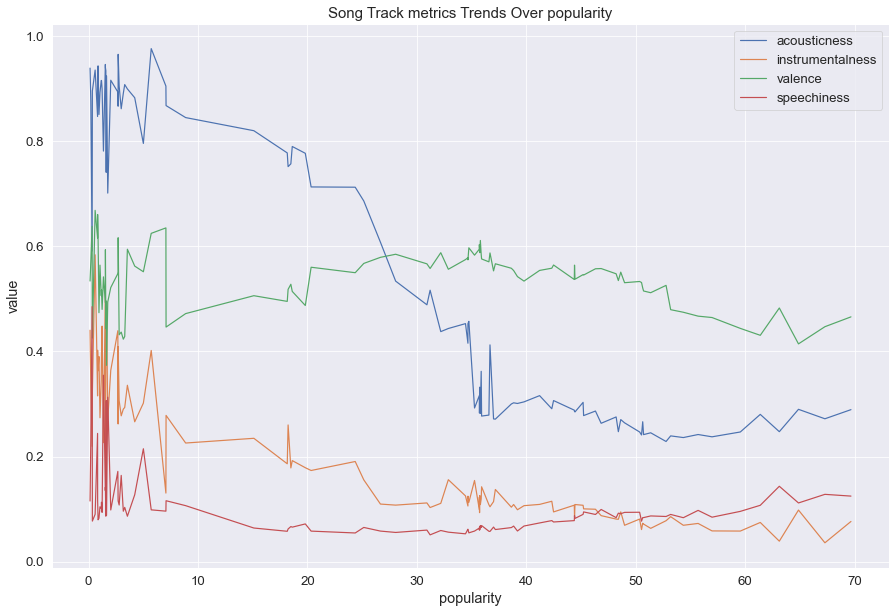

In [76]:
plt.figure(figsize=(15,10))
plt.title("Song Track metrics Trends Over popularity", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["acousticness","instrumentalness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='popularity', y=line, data=year_avg)
    
    
plt.ylabel("value")
plt.legend(lines)

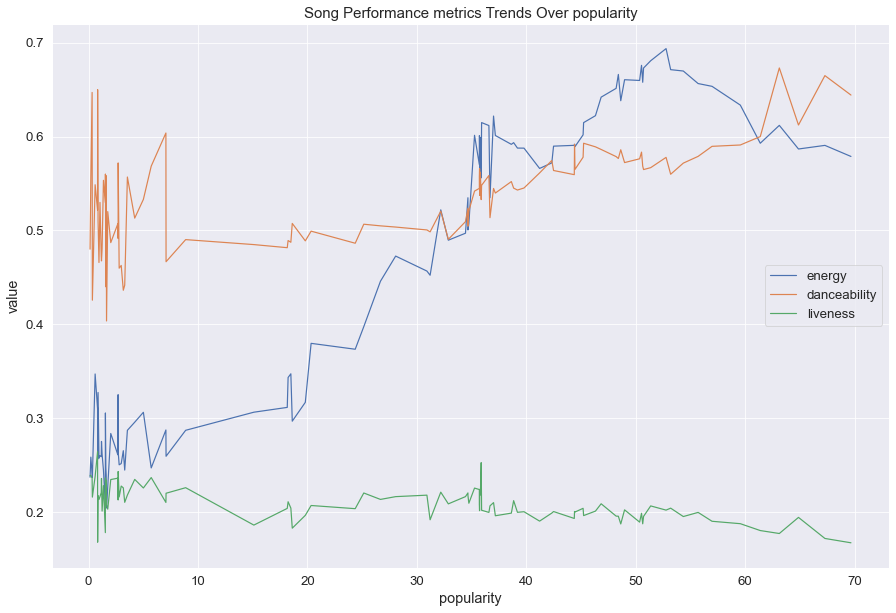

In [77]:
plt.figure(figsize=(15,10))
plt.title("Song Performance metrics Trends Over popularity", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["energy","danceability", "liveness"]

for line in lines:
    ax = sns.lineplot(x='popularity', y=line, data=year_avg)
    
    
plt.ylabel("value")
plt.legend(lines)

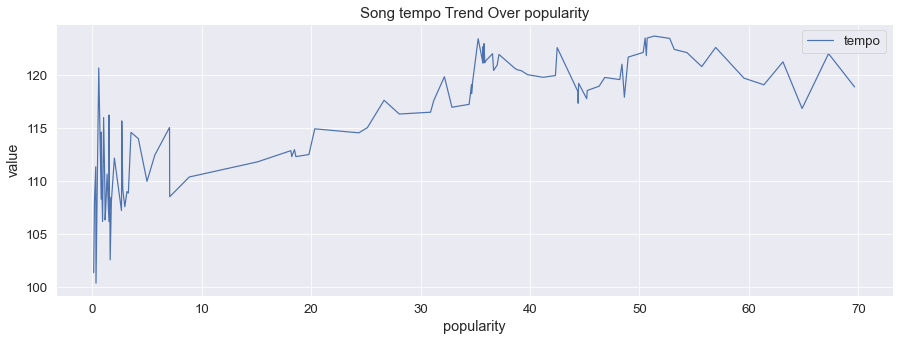

In [78]:
plt.figure(figsize=(15,5))
plt.title("Song tempo Trend Over popularity", fontdict={"fontsize": 15})

ax = sns.lineplot(x='popularity', y='tempo', data=year_avg)
    
    
plt.ylabel("value")
plt.legend(['tempo'])

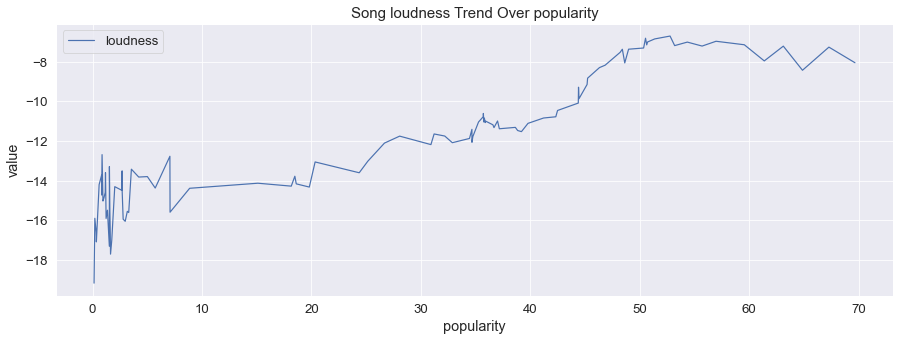

In [79]:
plt.figure(figsize=(15,5))
plt.title("Song loudness Trend Over popularity", fontdict={"fontsize": 15})

ax = sns.lineplot(x='popularity', y='loudness', data=year_avg)
    
    
plt.ylabel("value")
plt.legend(['loudness'])

In [80]:
df["artists"].sample(10)

58051                                      ['Scott Walker']
82096                                         ['Sam Cooke']
155069                ['Celia Cruz', 'La Sonora Matancera']
12058                                           ['Journey']
92519                                      ['Jimi Hendrix']
6403                                      ['Stan Whitmire']
2933                                        ['The Monkees']
147737                                        ['Jeff Beck']
165989                                               ['U2']
135457    ['Kari Jobe', 'Cody Carnes', 'Elevation Worship']
Name: artists, dtype: object

In [81]:
all_artists = []
for i in df["artists"]: 
    i = eval(i) #convert string of list to list type
    for j in i:
        all_artists.append(j)
all_artists[:10]

['Carl Woitschach',
 'Robert Schumann',
 'Vladimir Horowitz',
 'Seweryn Goszczyński',
 'Francisco Canaro',
 'Frédéric Chopin',
 'Vladimir Horowitz',
 'Felix Mendelssohn',
 'Vladimir Horowitz',
 'Franz Liszt']

In [82]:
print(len(all_artists))

225456


In [83]:
artists_names = pd.DataFrame(all_artists, columns=['artist'])
artists_names = artists_names.groupby('artist')['artist'].count().reset_index(name="song_count")
artists_names= pd.DataFrame(artists_names.sort_values(by="song_count",  ascending=False))
artists_names

,artist,song_count
8039,Francisco Canaro,2234
27525,Эрнест Хемингуэй,1215
8298,Frédéric Chopin,1035
14826,Ludwig van Beethoven,976
26605,Wolfgang Amadeus Mozart,938
...,...,...
14300,Livingston Taylor,1
14302,"Liz Callaway, Howard McGillin, David Zippel, L...",1
14303,Liz Damon's Orient Express,1
2365,Bernard Leighton,1


In [84]:
artists_with_more_than_500_songs = artists_names[artists_names['song_count']>500]

<AxesSubplot:xlabel='artist', ylabel='song_count'>

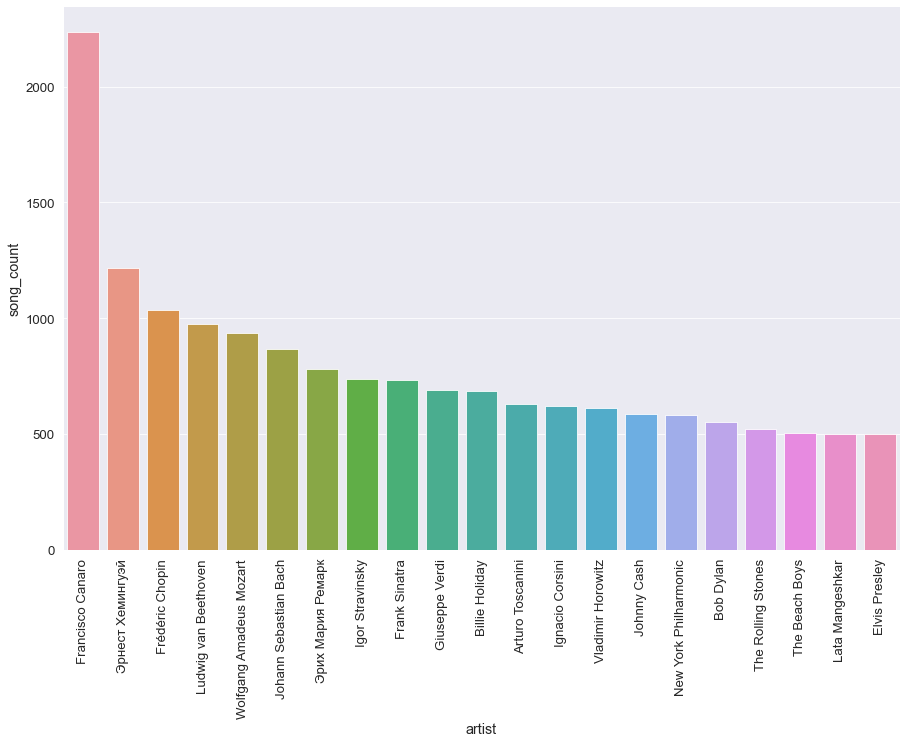

In [85]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x="artist", y="song_count", data=artists_with_more_than_500_songs)

## Models

In [86]:
lbc = LabelEncoder()

In [87]:
for col in categorical_columns:
    df[col] = lbc.fit_transform(df[col])
    print(lbc.classes_)

['["\'In The Heights\' Original Broadway Company", \'Mandy Gonzalez\']'
 '["\'In The Heights\' Original Broadway Company"]'
 '["\'Legally Blonde\' Ensemble", \'Michael Rupert\', \'Nikki Snelson\']'
 ... "['黃國隆']" "['黃蜀娟']" "['黑豹']"]
['!Que Vida! - Mono Version' '"40"' '"40" - Live' ... '행복 (Happiness)'
 "헤어지지 못하는 여자, 떠나가지 못하는 남자 Can't Breakup Girl, Can't Breakaway Boy (feat. 정인 Jung In)"
 '화려하지 않은 고백 Confession Is Not Flashy']
['1921' '1921-02-20' '1921-03-20' ... '2020-06-16' '2020-06-17'
 '2020-06-18']


### Decision Trees

In [92]:
clf = DecisionTreeClassifier()

In [93]:
df_nueric = df.drop(columns=categorical_columns)

In [95]:
X = df_nueric.drop(columns=['popularity', 'bin_pop'])
Y = df_nueric['bin_pop']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [96]:
clf.fit(x_train, y_train)

In [97]:
y_pred = clf.predict(x_test)

In [98]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred, average="binary"))
print(metrics.f1_score(y_test,y_pred, average="binary"))

0.809016538167265
0.8031578300669656
0.8011398455693098


### Random Forest Regressor

In [14]:
rf = RandomForestRegressor(n_estimators=50, random_state=42)

In [15]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [16]:
y_pred = rf.predict(x_test)

In [17]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

In [18]:
rmse

9.02778766483494

### Random Forest Classifier Binary

In [27]:
rfc = RandomForestClassifier(n_estimators=50, random_state=42, criterion='entropy')

In [ ]:
# X = df_nueric.drop(columns=['popularity', 'bin_pop'])
# Y = df_nueric['bin_pop']

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [29]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [30]:
y_pred = rfc.predict(x_test)

In [34]:
print("Accuracy  -> ", metrics.accuracy_score(y_test, y_pred))
print("Precision -> ", metrics.precision_score(y_test,y_pred, average="binary"))
print("Recall    -> ",metrics.recall_score(y_test,y_pred, average="binary"))
print("F1 Score  -> ",metrics.f1_score(y_test,y_pred, average="binary"))

Accuracy  ->  0.8486551703843211
Precision ->  0.8611540443070582
Recall    ->  0.8174093771012898
F1 Score  ->  0.8387117006930724


### Random Forest Multiclass

In [107]:
switcher = {}

for i in range(0, 21):
    switcher[i] = "Not Popular"
for i in range(21, 41): 
    switcher[i] = "Less Popular"
for i in range(41, 61): 
    switcher[i] = "Mild Popular"
for i in range(61, 81): 
    switcher[i] = "More Popular"
for i in range(81, 101): 
    switcher[i] = "Most Popular"

In [109]:
def decide_class(txt):
    return switcher.get(int(txt))
        

In [114]:
df_nueric['multi_pop'] = df_nueric['popularity'].apply(decide_class)

In [115]:
df_nueric.sample(10)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,bin_pop,multi_pop
18049,0.8570,0.475,158213,0.267,0,0.000010,1,0.1050,-11.971,1,17,0.0413,119.450,0.5000,1959,0,Not Popular
84744,0.0170,0.622,264907,0.540,0,0.007710,5,0.2650,-13.990,1,71,0.0261,130.879,0.8470,1988,1,More Popular
127654,0.9770,0.453,143047,0.443,0,0.809000,7,0.2860,-10.618,1,0,0.0638,67.953,0.7600,1942,0,Not Popular
151843,0.0645,0.853,245067,0.689,0,0.000003,10,0.0415,-5.364,0,60,0.0564,125.010,0.9480,2009,1,Mild Popular
22563,0.6090,0.332,275973,0.410,0,0.000140,4,0.0963,-6.988,1,46,0.0344,75.042,0.0715,2004,1,Mild Popular
144721,0.9950,0.421,188853,0.556,0,0.905000,7,0.2650,-9.786,0,0,0.0529,80.919,0.9650,1930,0,Not Popular
145660,0.9800,0.669,261347,0.520,0,0.000651,2,0.3880,-12.740,1,0,0.9420,103.277,0.5800,1947,0,Not Popular
15608,0.6620,0.520,224267,0.401,0,0.000000,2,0.1180,-9.157,1,51,0.0370,144.624,0.2240,2014,1,Mild Popular
51060,0.6400,0.622,315907,0.846,0,0.184000,7,0.3510,-3.740,1,22,0.0380,96.120,0.7860,1974,0,Less Popular
27647,0.3710,0.363,179800,0.602,0,0.000000,0,0.1050,-9.015,1,28,0.0293,184.525,0.8100,1975,0,Less Popular


In [124]:
df_nueric['multi_pop'] = df_nueric['multi_pop'].astype('category')

In [125]:
df_nueric.multi_pop.dtype

CategoricalDtype(categories=['Less Popular', 'Mild Popular', 'More Popular',
                  'Most Popular', 'Not Popular'],
, ordered=False)

In [126]:
df_nueric.groupby('multi_pop').size()

multi_pop
Less Popular    51836
Mild Popular    49268
More Popular    15160
Most Popular      457
Not Popular     53188
dtype: int64

In [127]:
X = df_nueric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
Y = df_nueric['multi_pop']

In [128]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [129]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [130]:
y_pred = rfc.predict(x_test)

In [131]:
print("Accuracy  -> ", metrics.accuracy_score(y_test, y_pred))
print("Precision -> ", metrics.precision_score(y_test,y_pred, average="weighted"))
print("Recall    -> ",metrics.recall_score(y_test,y_pred, average="weighted"))
print("F1 Score  -> ",metrics.f1_score(y_test,y_pred, average="weighted"))

Accuracy  ->  0.7469836972514861
Precision ->  0.7454815681438395
Recall    ->  0.7469836972514861
F1 Score  ->  0.7416384529109119


### Ranker

* Query by Year
* Rank on popularity
* -- Option (ordinal classification (bin 5))

In [68]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=1)

In [69]:
x_train.shape

(115537, 14)

In [73]:
query_train = [x_train.shape[0]]
query_val = [x_val.shape[0]]
query_test = [x_test.shape[0]]

In [74]:
params = {
    'objective': 'lambdarank',
    'metric': ['precision', 'ndcg'],   
    'num_leaves': 80,
}

In [71]:
gbm = lgb.LGBMRanker(**params)

In [134]:
# gbm.fit(
#         X = x_train, 
#         y = y_train, 
#         group=query_train,
#         eval_set=[(x_val, y_val)], 
#         eval_group=[query_val],
#         eval_at=10, 
#         early_stopping_rounds=30)

### Feature Importance

In [132]:
features = df_nueric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
feature_list = list(features.columns)

In [133]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: year                 Importance: 0.39
Variable: acousticness         Importance: 0.1
Variable: loudness             Importance: 0.07
Variable: energy               Importance: 0.06
Variable: danceability         Importance: 0.05
Variable: duration_ms          Importance: 0.05
Variable: speechiness          Importance: 0.05
Variable: valence              Importance: 0.05
Variable: instrumentalness     Importance: 0.04
Variable: liveness             Importance: 0.04
Variable: tempo                Importance: 0.04
Variable: key                  Importance: 0.03
Variable: explicit             Importance: 0.01
Variable: mode                 Importance: 0.01


## Regression

In [100]:
X1 = df[['acousticness', 'danceability', 
            'duration_ms', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

Y1 = df[['popularity']]
X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Sat, 27 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:49:45   Log-Likelihood:            -7.1087e+05
No. Observations:              169909   AIC:                         1.422e+06
Df Residuals:                  169898   BIC:                         1.422e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.9024      0.398  

In [101]:
lr_stats = sm.OLS(Y1, X1).fit()

# print the coefficients
lr_stats.params
lr_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Sat, 27 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:49:45   Log-Likelihood:            -7.1087e+05
No. Observations:              169909   AIC:                         1.422e+06
Df Residuals:                  169898   BIC:                         1.422e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.9024      0.398    102.851      0.000      40.123      41.682
acousticness       -23.2082      0.168   -138.233      0.000     -23.537     -22.879
danceability        27.0802      0.298     90.813      0.000      26.496      27.665
duration_ms       5.166e-07   3.29e-07      1.571      0.116   -1.28e-07    1.16e-06
energy              11.1166      0.318     35.013      0.000      10.494      11.739
instrumentalness    -7.0411      0.144    -48.797      0.000      -7.324      -6.758
liveness            -7.6301      0.228    -33.425      0.000      -8.078      -7.183
loudness             0.3234      0.012     26.790      0.000       0.300       0.347
speechiness        -25.7627      0.278    -92.590      0.000     -26.308     -25.217
tempo                0.0256      0.001     19.357      0.000       0.023       0.028
valence            -22.9175      0.197   -116.497      0.000     -23.303     -22.532
==============================================================================
Omnibus:                     7118.213   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8048.157
Skew:                           0.521   Prob(JB):                         0.00
Kurtosis:                       3.224   Cond. No.                     3.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
X2 = df[['acousticness', 'danceability']]#, 
            # 'energy', 'instrumentalness', 
            # 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
Y2 = df[['popularity']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                 4.704e+04
Date:                Sat, 27 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:49:45   Log-Likelihood:            -7.2560e+05
No. Observations:              169909   AIC:                         1.451e+06
Df Residuals:                  169906   BIC:                         1.451e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.3045      0.164    263.708   

In [103]:
X3 = df[['energy', 'instrumentalness']]
Y3 = df[['popularity']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                 3.211e+04
Date:                Sat, 27 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:49:45   Log-Likelihood:            -7.3580e+05
No. Observations:              169909   AIC:                         1.472e+06
Df Residuals:                  169906   BIC:                         1.472e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               15.8058      0.105  

### Heat Maps

In [104]:
ht_df = df[['popularity','acousticness', 'danceability', 
            'duration_ms','energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

<AxesSubplot:>

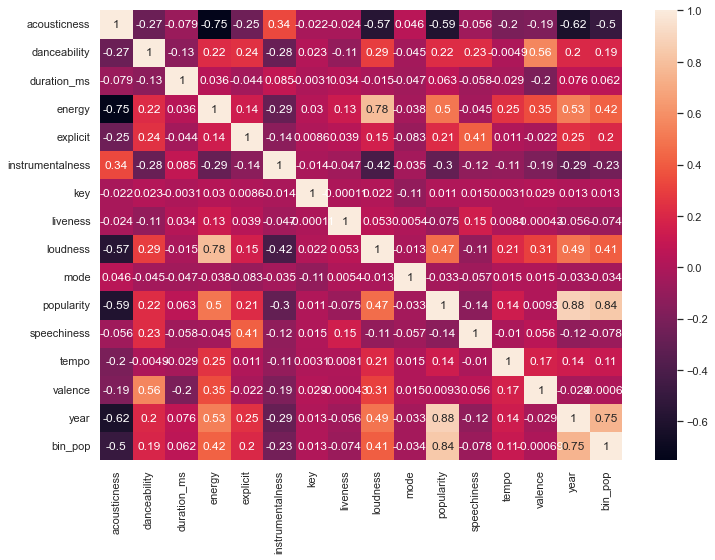

In [79]:
sns.heatmap(df_nueric.corr(), annot=True)

### Label Encoder

In [106]:
X3 = df.drop(columns=['popularity'])
Y3 = df[['popularity']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 3.629e+04
Date:                Sat, 27 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:49:46   Log-Likelihood:            -6.3281e+05
No. Observations:              169909   AIC:                         1.266e+06
Df Residuals:                  169891   BIC:                         1.266e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1275.0128      7.971  

In [107]:
# X4 = df.drop(columns=['popularity', 'track_name'])
# Y4 = df[['popularity']]
# X4 = sm.add_constant(X4)
# model4 = sm.OLS(Y4, X4).fit()
# print(model4.summary())

In [108]:
# X4 = df.drop(columns=['popularity', 'track_name', 'duration_ms', 'tempo'])
# Y4 = df[['popularity']]
# X4 = sm.add_constant(X4)
# model4 = sm.OLS(Y4, X4).fit()
# print(model4.summary())

In [109]:
# sls = df.drop(columns=['name', 'duration_ms', 'tempo'])

In [110]:
# sns.heatmap(sls.corr(), annot=True)